In [1]:
import numpy as np
import sys
sys.path.insert(1,'/home/zhanibek/.local/lib/python2.7/site-packages/cv2')
sys.path.insert(1,'/home/zhanibek/catkin_ws/src/smart_tray/scripts/')
import cv2 
import matplotlib.pyplot as plt
import os
from tqdm import tqdm_notebook
import pickle
import pandas as pd
from phri.utils import *

### Constants

In [2]:
meta_data_paths = [
'/home/zhanibek/catkin_ws/src/smart_tray/data/rosbag/koh_sanket/trial_0/koh_sanket_trial_0_2020-10-11-20-48-27_meta_data.pkl',
'/home/zhanibek/catkin_ws/src/smart_tray/data/rosbag/koh_zhanibek/trial_0/koh_zhanibek_trial_0_2020-10-11-21-19-07_meta_data.pkl',
'/home/zhanibek/catkin_ws/src/smart_tray/data/rosbag/sanket_vignesh/trial_0/trial_0_2020-10-12-14-47-43_meta_data.pkl',
'/home/zhanibek/catkin_ws/src/smart_tray/data/rosbag/sanket_vignesh/trial_1/trial_1_2020-10-12-14-51-53_meta_data.pkl',
'/home/zhanibek/catkin_ws/src/smart_tray/data/rosbag/zhanibek_sanket/trial_0/trial_0_2020-10-12-15-02-32_meta_data.pkl',
'/home/zhanibek/catkin_ws/src/smart_tray/data/rosbag/zhanibek_vignesh/trial_0/trial_0_2020-10-12-14-57-11_meta_data.pkl'
]

meta_data_path = meta_data_paths[5]

In [3]:
meta_data = pickle.load(open(meta_data_path))

In [4]:
meta_data.keys()

['camera_3',
 '/cam1_tray_pose_estimation',
 '/cam2_tray_pose_estimation',
 'summary',
 '/cam2_tray_grf',
 '/cam3_tray_pose_estimation',
 '/cam1_tray_grf',
 'camera_1',
 'camera_2',
 '/RFT_FORCE',
 '/imu_data',
 '/RFT_FORCE_2',
 '/cam3_tray_grf']

In [5]:
summary = meta_data['summary']
cam1_df = meta_data['camera_1']
cam2_df = meta_data['camera_2']
cam3_df = meta_data['camera_3']

rft1_df = meta_data['/RFT_FORCE']
rft2_df = meta_data['/RFT_FORCE_2']

imu_df = meta_data['/imu_data']

pose1_df = meta_data['/cam1_tray_pose_estimation']
pose2_df = meta_data['/cam2_tray_pose_estimation']
pose3_df = meta_data['/cam3_tray_pose_estimation']

grf1_df = meta_data['/cam1_tray_grf']
grf2_df = meta_data['/cam2_tray_grf']
grf3_df = meta_data['/cam3_tray_grf']


### Summary

In [6]:
summary

,topic_name,message_count,frequency,msg_type,start_time,end_time
0,/cam1_tray_pose_estimation,3956,14.724451,geometry_msgs/PoseStamped,1.602533e+09,1.602533e+09
1,/cam2_tray_grf,2842,29.522591,geometry_msgs/PoseStamped,1.602533e+09,1.602533e+09
2,/cam2_tray_pose_estimation,8125,31.104401,geometry_msgs/PoseStamped,1.602533e+09,1.602533e+09
3,/cam3_tray_pose_estimation,8143,30.066695,geometry_msgs/PoseStamped,1.602533e+09,1.602533e+09
4,/cam1_tray_grf,2642,14.530811,geometry_msgs/PoseStamped,1.602533e+09,1.602533e+09
5,/RFT_FORCE_2,224101,1006.552436,geometry_msgs/WrenchStamped,1.602533e+09,1.602533e+09
6,/RFT_FORCE,224064,1006.552436,geometry_msgs/WrenchStamped,1.602533e+09,1.602533e+09
7,/imu_data,20988,77.307234,smart_tray/imu_msg,1.602533e+09,1.602533e+09
8,/cam3_tray_grf,3843,29.677799,geometry_msgs/PoseStamped,1.602533e+09,1.602533e+09
9,/camera_1,2188,8.051427,sensor_msgs/Image,NaN,NaN


In [7]:
t0 = summary.start_time[0]
tf = summary.end_time[0]
print t0, tf
print tf-t0

1602532631.18511 1602532902.7002592
271.5151491165161


In [9]:
imu_delay = 52345.383253

In [30]:
cam1_df.head()

,seq,time_stamp,frame_id,image_path
0,43078,1.602533e+09,angetube_43077,/home/zhanibek/catkin_ws/src/smart_tray/data/r...
1,43079,1.602533e+09,angetube_43078,/home/zhanibek/catkin_ws/src/smart_tray/data/r...
2,43080,1.602533e+09,angetube_43079,/home/zhanibek/catkin_ws/src/smart_tray/data/r...
3,43081,1.602533e+09,angetube_43080,/home/zhanibek/catkin_ws/src/smart_tray/data/r...
4,43082,1.602533e+09,angetube_43081,/home/zhanibek/catkin_ws/src/smart_tray/data/r...


In [31]:
pose1_df.head()

,seq,time_stamp,frame_id,position,quaternion
0,22099,1.602533e+09,angetube_43057,"[1.2437311101569888, 0.2810023559759937, 2.859...","[0.5992339379517309, 0.6153556550161322, -0.33..."
1,22100,1.602533e+09,angetube_43058,"[1.2455364881725848, 0.2824191074179014, 2.863...","[0.6004743321104632, 0.6138242170184248, -0.33..."
2,22101,1.602533e+09,angetube_43059,"[1.2416384633255966, 0.2812401562084742, 2.853...","[0.5973719946675762, 0.6152550457362251, -0.34..."
3,22102,1.602533e+09,angetube_43060,"[1.2495875213508822, 0.28343481472669146, 2.87...","[0.601484947087394, 0.612348939220602, -0.3387..."
4,22103,1.602533e+09,angetube_43071,"[1.2471830663147345, 0.2822123649588538, 2.867...","[0.603030272117085, 0.613514922343204, -0.3374..."


In [32]:
grf1_df.head()

,seq,time_stamp,frame_id,position,quaternion
0,15272,1.602533e+09,GRF repr,"[1.3347371698855013, 0.03493551796473904, 0.01...","[-0.018748768529677468, 0.0025737311259593785,..."
1,15273,1.602533e+09,GRF repr,"[1.3368864555815325, 0.03776811420788473, 0.01...","[-0.018949134444693334, 0.002164062238887697, ..."
2,15274,1.602533e+09,GRF repr,"[1.3321919100924615, 0.030292464499335203, 0.0...","[-0.02050826607943469, 0.0004865535012809786, ..."
3,15275,1.602533e+09,GRF repr,"[1.3418728120491539, 0.0467259360732708, 0.010...","[-0.01928293813086076, 0.0015538851320647084, ..."
4,15276,1.602533e+09,GRF repr,"[1.3388674454135374, 0.04120796717968389, 0.01...","[-0.015674474168409662, 0.0030764634811575094,..."


### Camera 1

In [10]:
cam1_df.head()

,seq,time_stamp,frame_id,image_path
0,43078,1.602533e+09,angetube_43077,/home/zhanibek/catkin_ws/src/smart_tray/data/r...
1,43079,1.602533e+09,angetube_43078,/home/zhanibek/catkin_ws/src/smart_tray/data/r...
2,43080,1.602533e+09,angetube_43079,/home/zhanibek/catkin_ws/src/smart_tray/data/r...
3,43081,1.602533e+09,angetube_43080,/home/zhanibek/catkin_ws/src/smart_tray/data/r...
4,43082,1.602533e+09,angetube_43081,/home/zhanibek/catkin_ws/src/smart_tray/data/r...


In [11]:
cam2_df.head()

,seq,time_stamp,frame_id,image_path
0,34539,1.602533e+09,logitech_t1_34538,/home/zhanibek/catkin_ws/src/smart_tray/data/r...
1,34540,1.602533e+09,logitech_t1_34539,/home/zhanibek/catkin_ws/src/smart_tray/data/r...
2,34541,1.602533e+09,logitech_t1_34540,/home/zhanibek/catkin_ws/src/smart_tray/data/r...
3,34542,1.602533e+09,logitech_t1_34541,/home/zhanibek/catkin_ws/src/smart_tray/data/r...
4,34543,1.602533e+09,logitech_t1_34542,/home/zhanibek/catkin_ws/src/smart_tray/data/r...


In [12]:
cam3_df.head()

,seq,time_stamp,frame_id,image_path
0,34698,1.602533e+09,logitech_t2_34697,/home/zhanibek/catkin_ws/src/smart_tray/data/r...
1,34699,1.602533e+09,logitech_t2_34698,/home/zhanibek/catkin_ws/src/smart_tray/data/r...
2,34700,1.602533e+09,logitech_t2_34699,/home/zhanibek/catkin_ws/src/smart_tray/data/r...
3,34701,1.602533e+09,logitech_t2_34700,/home/zhanibek/catkin_ws/src/smart_tray/data/r...
4,34702,1.602533e+09,logitech_t2_34701,/home/zhanibek/catkin_ws/src/smart_tray/data/r...


1640


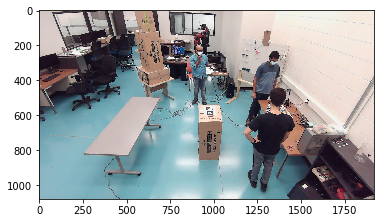

In [13]:
df = cam1_df
ind = np.random.randint(df.shape[0])
impath = df.image_path.iloc[ind]
im = read_image(impath)
plt.imshow(im)
print ind

### Force Data

In [14]:
rft1_df.head()

,seq,time_stamp,frame_id,force,torque
0,995877,1.602533e+09,C00300119,"[-0.03999999910593033, 0.019999999552965164, 0...","[0.0010000000474974513, 0.019999999552965164, ..."
1,995878,1.602533e+09,C00300119,"[-0.019999999552965164, 0.03999999910593033, 0...","[0.0010000000474974513, 0.03999999910593033, 0..."
2,995879,1.602533e+09,C00300119,"[0.0, 0.05999999865889549, 0.18000000715255737]","[0.0005000000237487257, 0.05999999865889549, 0..."
3,995880,1.602533e+09,C00300119,"[0.0, 0.05999999865889549, 0.1599999964237213]","[0.0005000000237487257, 0.05999999865889549, 0..."
4,995881,1.602533e+09,C00300119,"[0.019999999552965164, 0.07999999821186066, 0....","[0.0, 0.07999999821186066, 0.18000000715255737]"


Text(0.5,1,'Force 1')

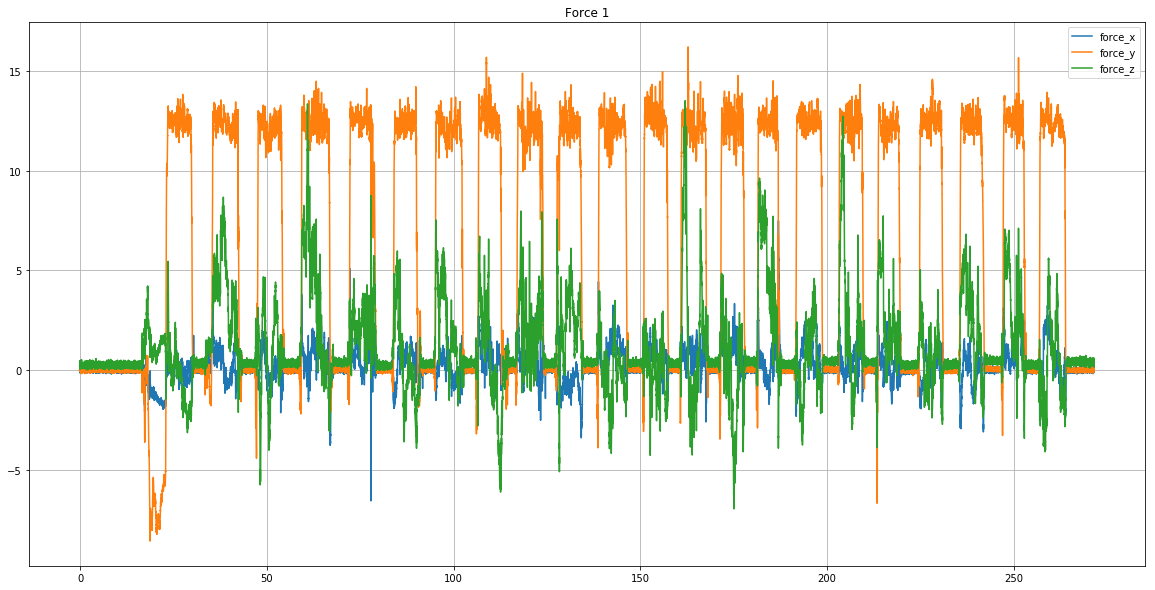

In [15]:
df = rft1_df
force1_x = df.force.apply(lambda x: x[0])
force1_y = df.force.apply(lambda x: x[1])
force1_z = df.force.apply(lambda x: x[2])

rft1_t_vec = df.time_stamp-t0

plt.figure(figsize=(20,10))
plt.plot(rft1_t_vec, force1_x)
plt.plot(rft1_t_vec, force1_y)
plt.plot(rft1_t_vec, force1_z)
plt.grid()
plt.legend(['force_x', 'force_y', 'force_z'])
plt.title('Force 1')

Text(0.5,1,'Force 1')

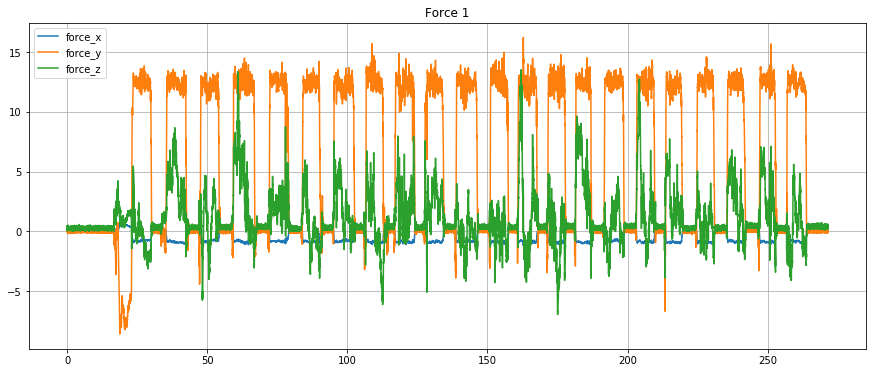

In [16]:
df = rft1_df
torque1_x = df.torque.apply(lambda x: x[0])
torque1_y = df.torque.apply(lambda x: x[1])
torque1_z = df.torque.apply(lambda x: x[2])

rft1_t_vec = df.time_stamp-t0

plt.figure(figsize=(15,6))
plt.plot(rft1_t_vec, torque1_x)
plt.plot(rft1_t_vec, torque1_y)
plt.plot(rft1_t_vec, force1_z)
plt.grid()
plt.legend(['force_x', 'force_y', 'force_z'])
plt.title('Force 1')

In [17]:
rft2_df.head()

,seq,time_stamp,frame_id,force,torque
0,996800,1.602533e+09,C00300122,"[0.07999999821186066, 0.019999999552965164, 0....","[0.0024999999441206455, 0.019999999552965164, ..."
1,996801,1.602533e+09,C00300122,"[0.05999999865889549, 0.019999999552965164, 0....","[0.0024999999441206455, 0.019999999552965164, ..."
2,996802,1.602533e+09,C00300122,"[0.05999999865889549, 0.019999999552965164, 0....","[0.0024999999441206455, 0.019999999552965164, ..."
3,996803,1.602533e+09,C00300122,"[0.05999999865889549, 0.019999999552965164, 0....","[0.0024999999441206455, 0.019999999552965164, ..."
4,996804,1.602533e+09,C00300122,"[0.05999999865889549, 0.0, 0.46000000834465027]","[0.003000000026077032, 0.0, 0.46000000834465027]"


Text(0.5,1,'Force 2')

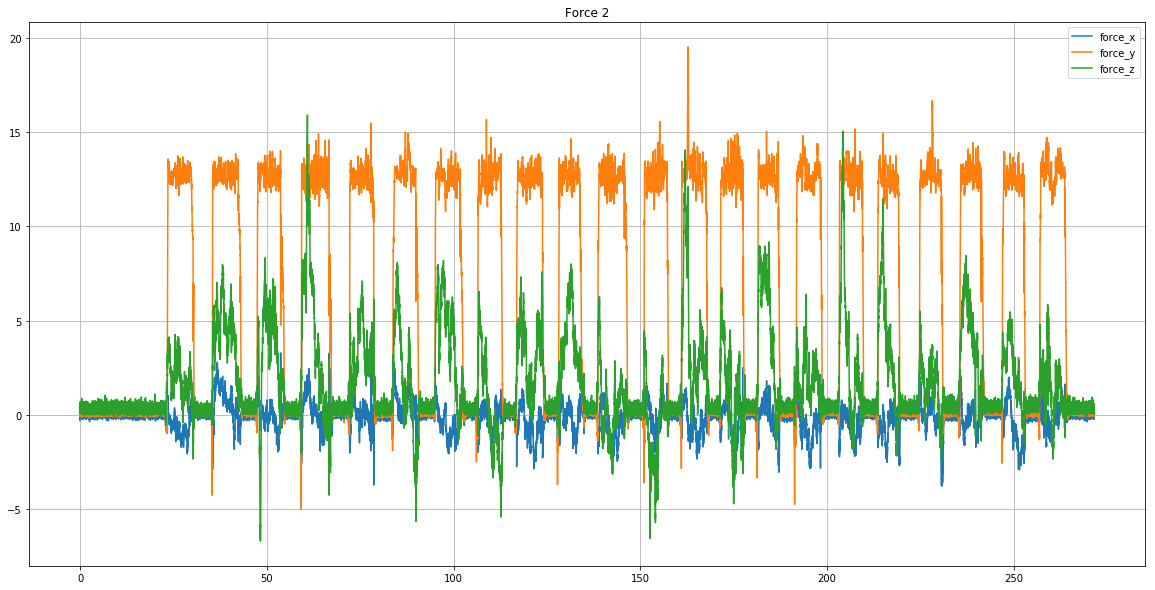

In [18]:
df = rft2_df
force2_x = df.force.apply(lambda x: x[0])
force2_y = df.force.apply(lambda x: x[1])
force2_z = df.force.apply(lambda x: x[2])

rft2_t_vec = df.time_stamp-t0

plt.figure(figsize=(20,10))
plt.plot(rft2_t_vec, force2_x)
plt.plot(rft2_t_vec, force2_y)
plt.plot(rft2_t_vec, force2_z)
plt.grid()
plt.legend(['force_x', 'force_y', 'force_z'])
plt.title('Force 2')

Text(0.5,1,'Force 2')

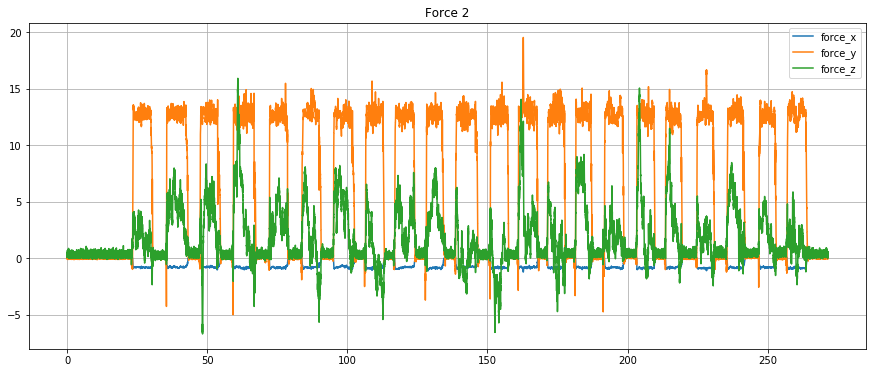

In [19]:
df = rft2_df
torque2_x = df.torque.apply(lambda x: x[0])
torque2_y = df.torque.apply(lambda x: x[1])
torque2_z = df.torque.apply(lambda x: x[2])

rft2_t_vec = df.time_stamp-t0

plt.figure(figsize=(15,6))
plt.plot(rft2_t_vec, torque2_x)
plt.plot(rft2_t_vec, torque2_y)
plt.plot(rft2_t_vec, torque2_z)
plt.grid()
plt.legend(['force_x', 'force_y', 'force_z'])
plt.title('Force 2')

## Position Data

### grf

Text(0.5,1,'Linear Position')

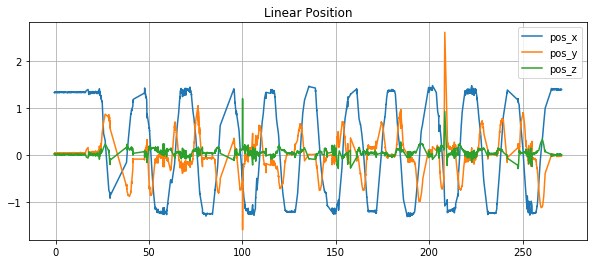

In [20]:
df = grf1_df
grf1_x = df.position.apply(lambda x: x[0])
grf1_y = df.position.apply(lambda x: x[1])
grf1_z = df.position.apply(lambda x: x[2])

grf1_t_vec = df.time_stamp-t0

plt.figure(figsize=(10,4))
plt.plot(grf1_t_vec, grf1_x)
plt.plot(grf1_t_vec, grf1_y)
plt.plot(grf1_t_vec, grf1_z)
plt.grid()
plt.legend(['pos_x', 'pos_y', 'pos_z'])
plt.title('Linear Position')

Text(0.5,1,'Linear Position')

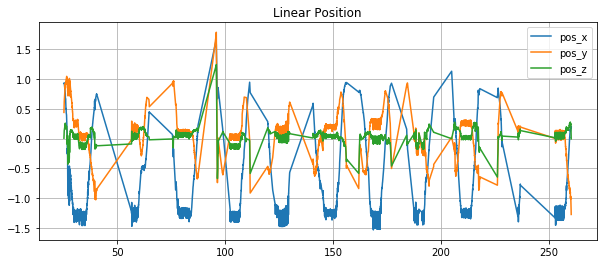

In [21]:
df = grf2_df
grf2_x = df.position.apply(lambda x: x[0])
grf2_y = df.position.apply(lambda x: x[1])
grf2_z = df.position.apply(lambda x: x[2])

grf2_t_vec = df.time_stamp-t0

plt.figure(figsize=(10,4))
plt.plot(grf2_t_vec, grf2_x)
plt.plot(grf2_t_vec, grf2_y)
plt.plot(grf2_t_vec, grf2_z)
plt.grid()
plt.legend(['pos_x', 'pos_y', 'pos_z'])
plt.title('Linear Position')

Text(0.5,1,'Linear Position')

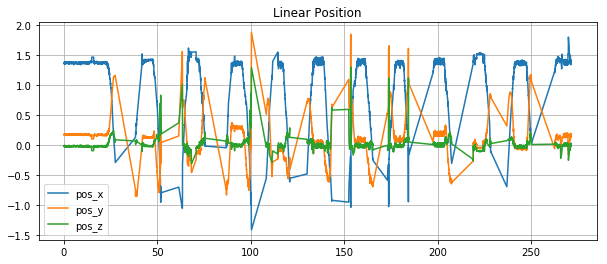

In [22]:
df = grf3_df
grf3_x = df.position.apply(lambda x: x[0])
grf3_y = df.position.apply(lambda x: x[1])
grf3_z = df.position.apply(lambda x: x[2])

grf3_t_vec = df.time_stamp-t0

plt.figure(figsize=(10,4))
plt.plot(grf3_t_vec, grf3_x)
plt.plot(grf3_t_vec, grf3_y)
plt.plot(grf3_t_vec, grf3_z)
plt.grid()
plt.legend(['pos_x', 'pos_y', 'pos_z'])
plt.title('Linear Position')

### Raw Pose Data

Text(0.5,1,'Linear Position')

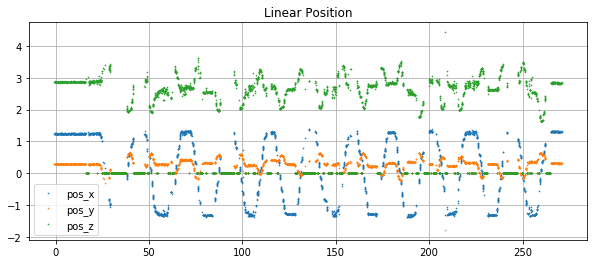

In [23]:
df = pose1_df
pose1_x = df.position.apply(lambda x: x[0])
pose1_y = df.position.apply(lambda x: x[1])
pose1_z = df.position.apply(lambda x: x[2])

pose1_t_vec = df.time_stamp-t0

plt.figure(figsize=(10,4))
plt.plot(pose1_t_vec, pose1_x, '.', MarkerSize=1.2)
plt.plot(pose1_t_vec, pose1_y, '.', MarkerSize=1.2)
plt.plot(pose1_t_vec, pose1_z, '.', MarkerSize=1.2)
plt.grid()
plt.legend(['pos_x', 'pos_y', 'pos_z'])
plt.title('Linear Position')

Text(0.5,1,'Linear Position')

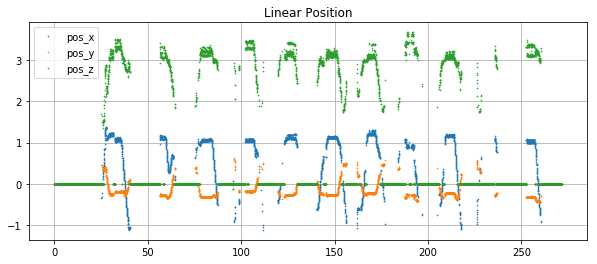

In [24]:
df = pose2_df
pose2_x = df.position.apply(lambda x: x[0])
pose2_y = df.position.apply(lambda x: x[1])
pose2_z = df.position.apply(lambda x: x[2])

pose2_t_vec = df.time_stamp-t0

plt.figure(figsize=(10,4))
plt.plot(pose2_t_vec, pose2_x, '.', MarkerSize=1.2)
plt.plot(pose2_t_vec, pose2_y, '.', MarkerSize=1.2)
plt.plot(pose2_t_vec, pose2_z, '.', MarkerSize=1.2)
plt.grid()
plt.legend(['pos_x', 'pos_y', 'pos_z'])
plt.title('Linear Position')

Text(0.5,1,'Linear Position')

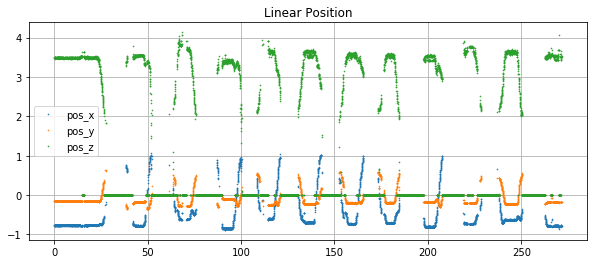

In [25]:
df = pose3_df
pose3_x = df.position.apply(lambda x: x[0])
pose3_y = df.position.apply(lambda x: x[1])
pose3_z = df.position.apply(lambda x: x[2])

pose3_t_vec = df.time_stamp-t0

plt.figure(figsize=(10,4))
plt.plot(pose3_t_vec, pose3_x, '.', MarkerSize=1.2)
plt.plot(pose3_t_vec, pose3_y, '.', MarkerSize=1.2)
plt.plot(pose3_t_vec, pose3_z, '.', MarkerSize=1.2)
plt.grid()
plt.legend(['pos_x', 'pos_y', 'pos_z'])
plt.title('Linear Position')

### IMU Data

In [26]:
imu_df.head()

,seq,time_stamp,frame_id,accel,gyro,mag
0,77634,1.602480e+09,LSM9DS1_IMU_SENSOR_DATA,"[0.1495819091796875, -0.04307958984375, 10.482...","[5.644989013671875, -17.443389892578125, -4.83...","[0.04633999988436699, 0.03863999992609024, -0...."
1,77635,1.602480e+09,LSM9DS1_IMU_SENSOR_DATA,"[0.16454010009765627, -0.0478662109375, 10.565...","[5.600128173828125, -17.368621826171875, -4.97...","[0.044940002262592316, 0.03807999938726425, -0..."
2,77636,1.602480e+09,LSM9DS1_IMU_SENSOR_DATA,"[0.17770330810546878, -0.062226074218750003, 1...","[5.7122802734375, -17.286376953125, -4.8898315...","[0.04312000051140785, 0.04172000288963318, -0...."
3,77637,1.602480e+09,LSM9DS1_IMU_SENSOR_DATA,"[0.14120532226562502, -0.04966119384765626, 10...","[5.644989013671875, -17.39105224609375, -4.979...","[0.044940002262592316, 0.04340000078082085, -0..."
4,77638,1.602480e+09,LSM9DS1_IMU_SENSOR_DATA,"[0.14419696044921876, -0.04307958984375, 10.58...","[5.630035400390625, -15.56671142578125, -4.942...","[0.04382000118494034, 0.04255999997258186, -0...."


In [27]:
df.time_stamp[0]

1602532631.284042

Text(0.5,1,'Acceleration')

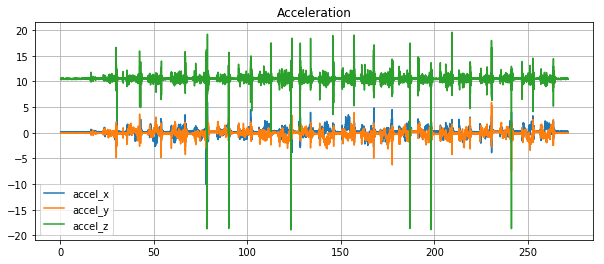

In [28]:
df = imu_df
accel_x = df.accel.apply(lambda x: x[0])
accel_y = df.accel.apply(lambda x: x[1])
accel_z = df.accel.apply(lambda x: x[2])

imu_t_vec = df.time_stamp-t0 + imu_delay

plt.figure(figsize=(10,4))
plt.plot(imu_t_vec, accel_x)
plt.plot(imu_t_vec, accel_y)
plt.plot(imu_t_vec, accel_z)
plt.grid()
plt.legend(['accel_x', 'accel_y', 'accel_z'])
plt.title('Acceleration')

### Mix Plot

Text(0.5,0,'time, sec')

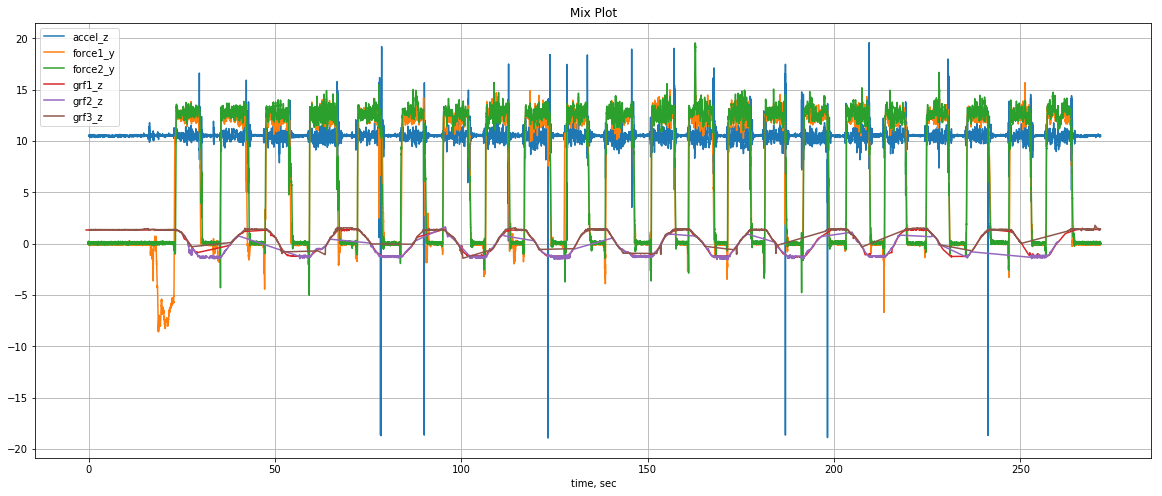

In [29]:
plt.figure(figsize=(20,8))

plt.plot(imu_t_vec, accel_z)
plt.plot(rft1_t_vec, force1_y)
plt.plot(rft2_t_vec, force2_y)
plt.plot(grf1_t_vec, grf1_x)
plt.plot(grf2_t_vec, grf2_x)
plt.plot(grf3_t_vec, grf3_x)
plt.grid()
plt.legend(['accel_z', 'force1_y', 'force2_y', 'grf1_z', 'grf2_z', 'grf3_z'])
plt.title('Mix Plot')
plt.xlabel('time, sec')